In [1]:
import librosa
import sounddevice as sd
import numpy as np
import matplotlib.pyplot as plt
from fastdtw import fastdtw
from scipy.spatial.distance import euclidean


In [2]:
# 音声ファイルを読み込む
file_list = ['hello.wav','hello2.wav','hello3.wav','tokikane.wav']
ys = []
for file in file_list:
    y, sr = librosa.load(file)
    ys.append(y)

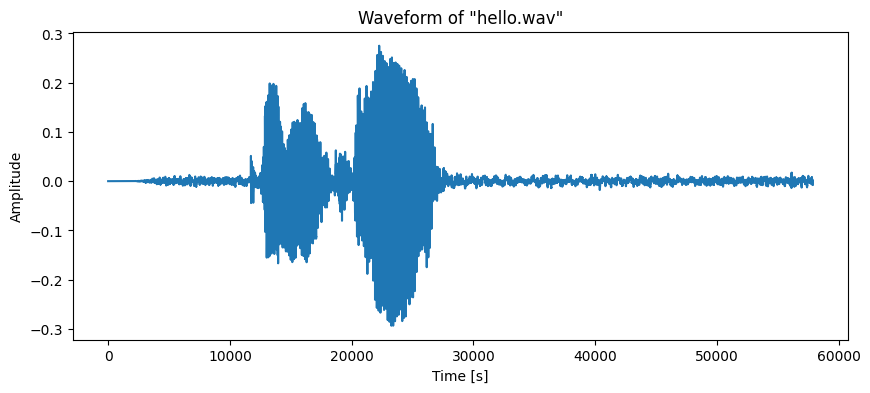

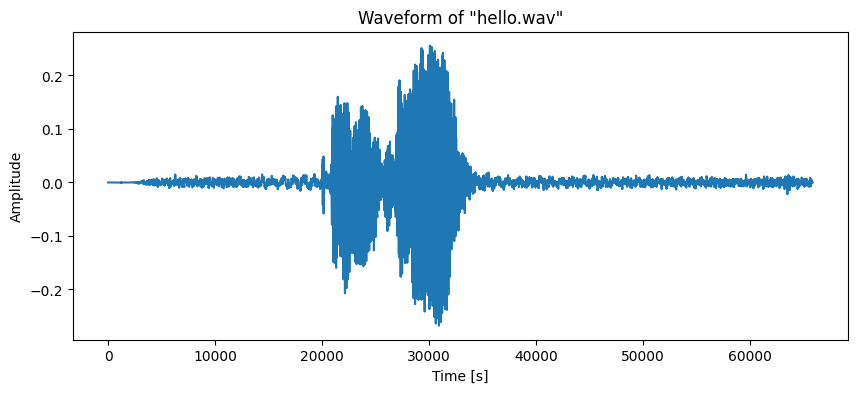

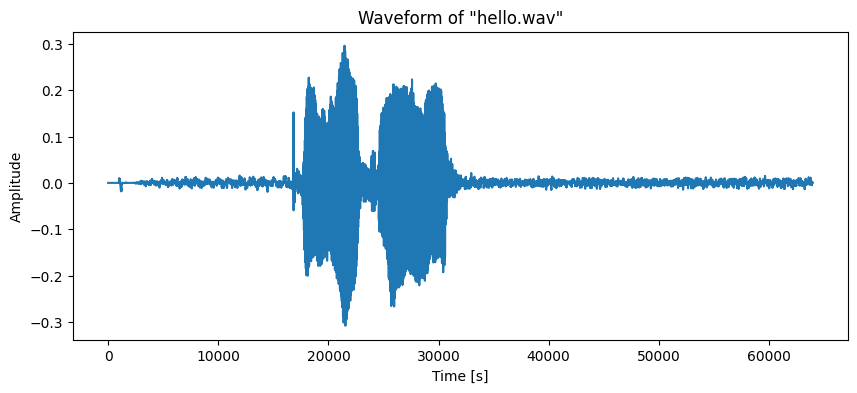

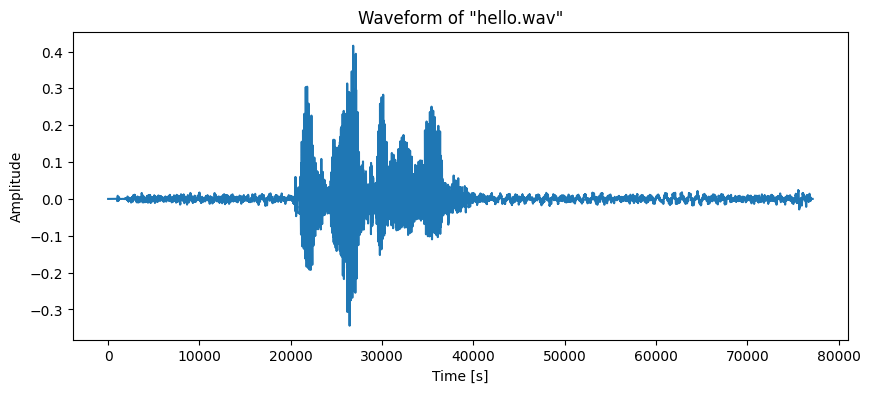

In [3]:
# 波形を表示するための設定
for y in ys:
    plt.figure(figsize=(10, 4))

    # 波形をプロット
    plt.plot(y)
    plt.title('Waveform of "hello.wav"')
    plt.xlabel('Time [s]')
    plt.ylabel('Amplitude')

    # 表示！
    plt.show()

In [23]:
sd.play(ys[1],sr)

In [24]:
def apply_average_filter(y, filter_size=5):
    # 平均化フィルタのカーネルを作成
    kernel = np.ones(filter_size) / filter_size
    
    # 畳み込みを適用
    y_filtered = np.convolve(y, kernel, 'same')
    
    return y_filtered
def compare(y1,y2,sr):
    y1 = apply_average_filter(y1)
    y2 = apply_average_filter(y2)
    mfcc1 = librosa.feature.mfcc(y=y1, sr=sr, n_mfcc=13)
    mfcc2 = librosa.feature.mfcc(y=y2, sr=sr, n_mfcc=13)
    distance, _ = fastdtw(mfcc1.T, mfcc2.T, dist=euclidean)
    pitch1, mag1 = librosa.piptrack(y=y1, sr=sr)
    pitch2, mag2 = librosa.piptrack(y=y2, sr=sr)
    distance, _ = fastdtw(mag1.T, mag2.T, dist=euclidean)
    return distance

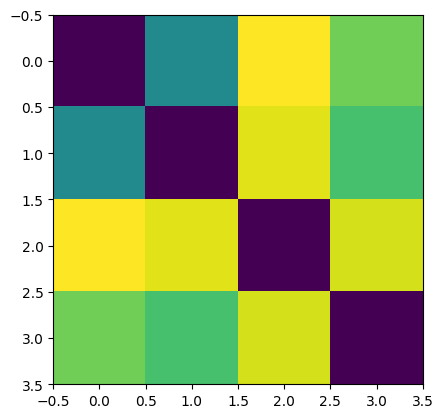

In [25]:
# 評価関数を可視化
n = len(ys)
d=np.zeros((n,n))
for i in range(n):
    for j in range(n):
        d[i][j] = compare(ys[i],ys[j],sr)
plt.imshow(d)
plt.show()

172297.6411216811
(1025, 114) (1025, 114) 0.028931484
80.86842105263158


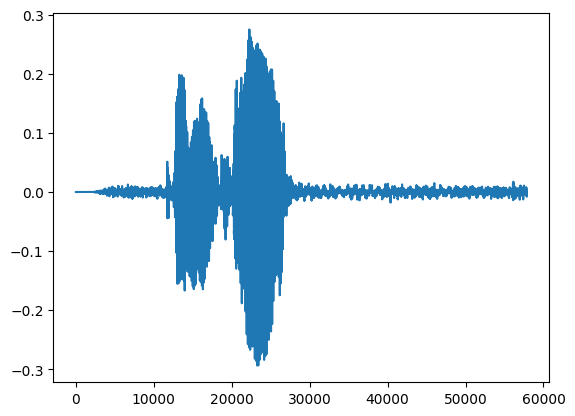

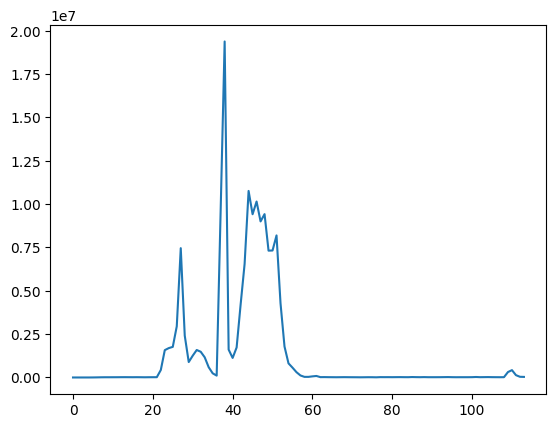

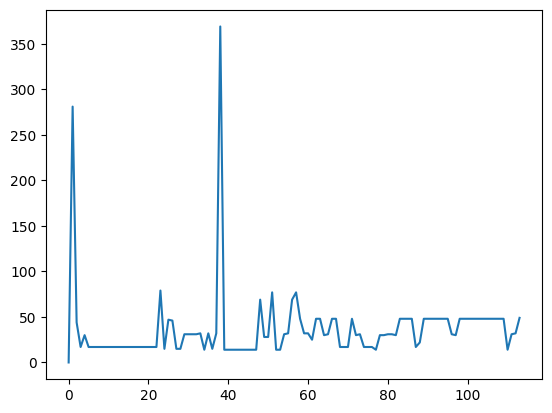

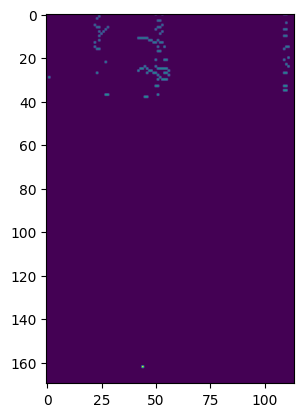

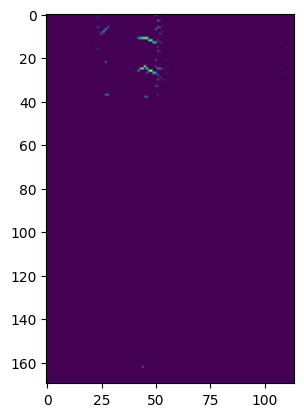

147026.4009126288
(1025, 129) (1025, 129) 0.021767078
67.13953488372093


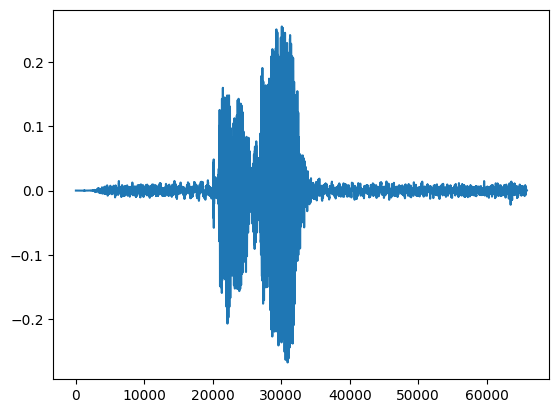

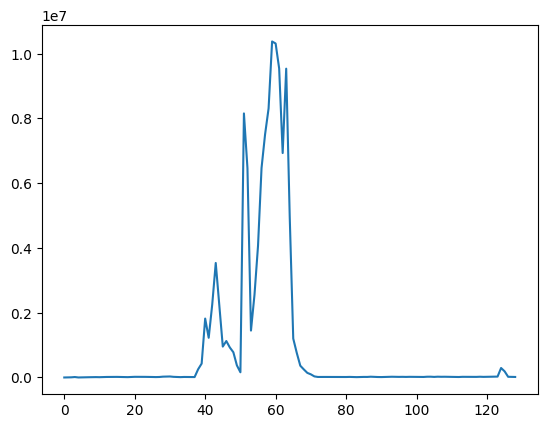

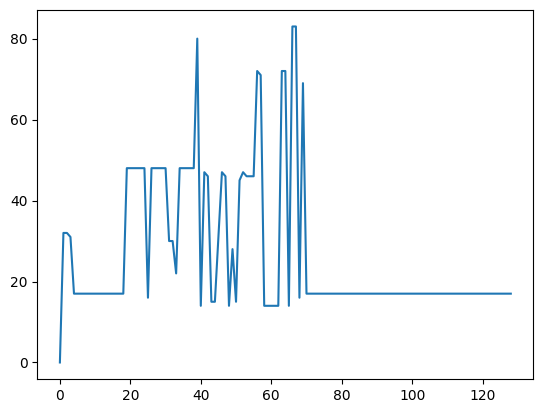

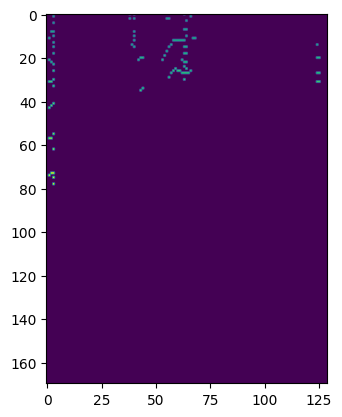

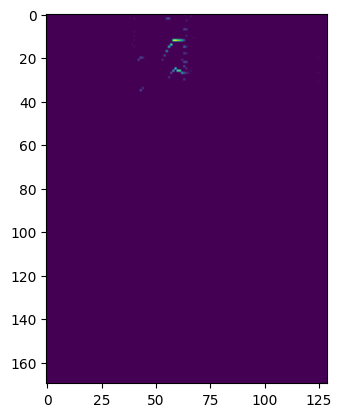

164692.20383584686
(1025, 125) (1025, 125) 0.02171322
74.816


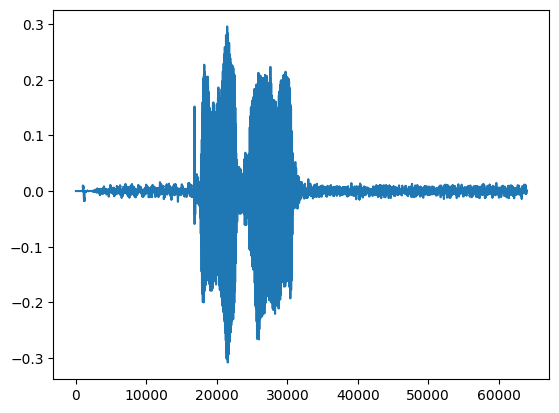

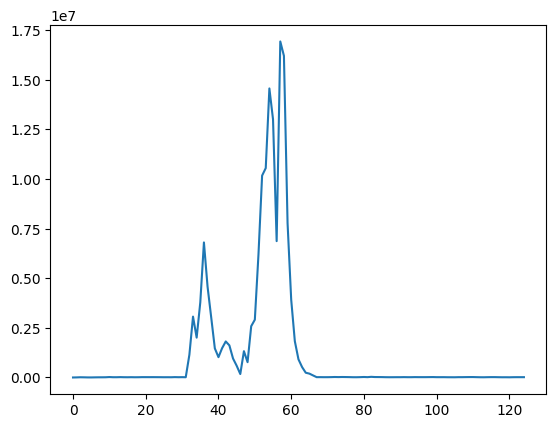

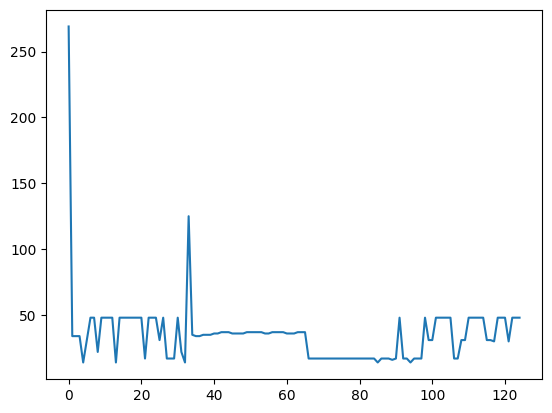

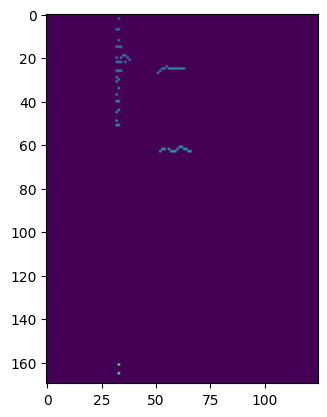

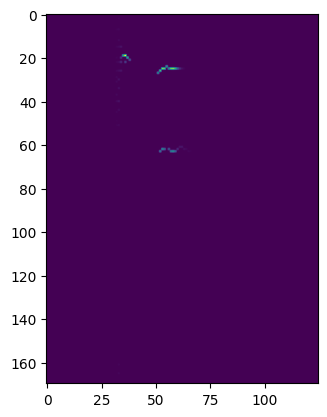

153949.5289170558
(1025, 151) (1025, 151) 0.018288445
66.57615894039735


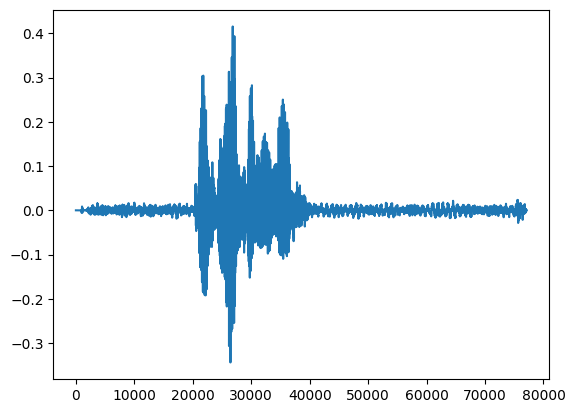

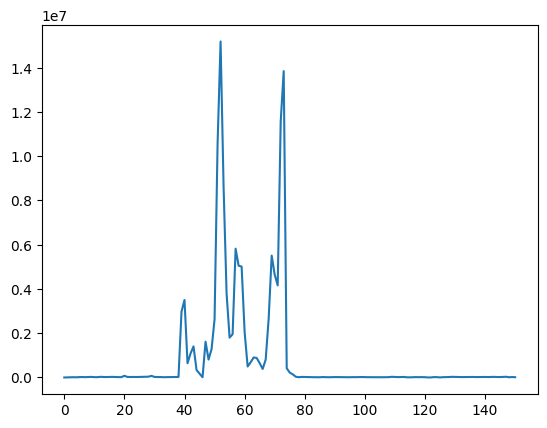

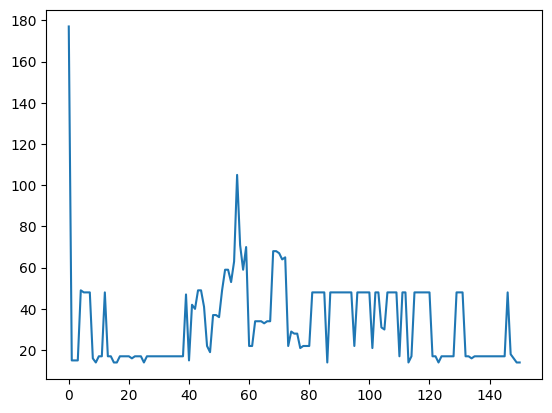

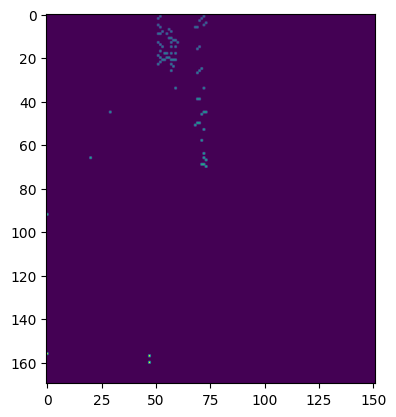

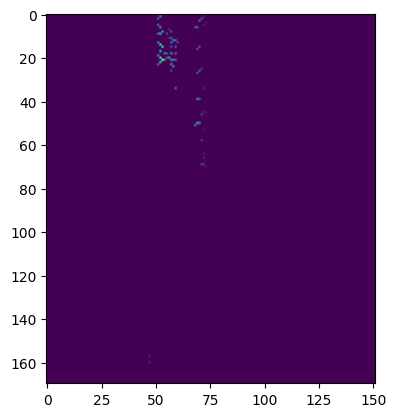

In [52]:
for y in ys:
    pitch, mag = librosa.piptrack(y=y, sr=sr)
    print((np.arange(len(mag))[:,np.newaxis] * mag).sum())
    print(pitch.shape, mag.shape, mag.mean())
    print(pitch.argmax(axis=0).mean())
    plt.plot(y)
    plt.show()
    plt.plot((np.arange(len(mag))[:,np.newaxis] * mag * pitch).sum(axis = 0))
    plt.show()
    plt.plot(mag.argmax(axis = 0))
    plt.show()
    plt.imshow(pitch[85:255])
    plt.show()
    plt.imshow(mag[85:255])
    plt.show()

In [35]:
(np.arange(len(mag))[:,np.newaxis] * mag).sum(axis = 0)

array([0.00000000e+00, 2.69474417e-10, 8.15201934e-03, 3.46926304e-01,
       7.27493472e-01, 6.33484981e+00, 1.46260410e+01, 2.64855447e+01,
       3.29816234e+01, 3.42897205e+01, 3.69569519e+01, 3.75083939e+01,
       4.46894329e+01, 4.87580060e+01, 4.61298872e+01, 4.11746690e+01,
       4.78878050e+01, 4.18233356e+01, 3.21675647e+01, 3.92108833e+01,
       4.30292338e+01, 4.29765725e+01, 5.88157660e+02, 1.16632081e+03,
       2.47149023e+03, 2.97218979e+03, 4.89193766e+03, 6.56661219e+03,
       3.81751676e+03, 2.42320517e+03, 2.91245253e+03, 3.49552567e+03,
       3.30106224e+03, 2.64359894e+03, 1.81280624e+03, 7.00269687e+02,
       3.28832311e+02, 2.71592938e+03, 5.58852860e+03, 1.05479955e+03,
       2.69284749e+03, 3.95512638e+03, 6.75087024e+03, 9.17712352e+03,
       1.15914752e+04, 1.16488669e+04, 1.22623231e+04, 1.13554953e+04,
       1.17445096e+04, 9.24921044e+03, 8.65418971e+03, 9.60073467e+03,
       5.27180035e+03, 2.34576205e+03, 1.02762936e+03, 7.11211657e+02,
      

In [ ]:
def apply_average_filter(y, filter_size=5):
    # 平均化フィルタのカーネルを作成
    kernel = np.ones(filter_size) / filter_size
    
    # 畳み込みを適用
    y_filtered = np.convolve(y, kernel, 'same')
    
    return y_filtered

In [ ]:
ys.append(apply_average_filter(ys[0]))

In [ ]:
sd.play(apply_average_filter(y, filter_size = 3),sr)

In [ ]:
y_shifted = librosa.effects.pitch_shift(ys[0], sr = sr, n_steps=4)

In [ ]:
sd.play(y_shifted,sr)

In [ ]:
ys.append(y_shifted)